# 1. Installing dependencies 


In [7]:
# !pip install -r requirements.txt
# !pip install --upgrade numpy
# !pip install --upgrade h5py


  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Audrey\\anaconda3\\Lib\\site-packages\\~5py\\defs.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



      Successfully uninstalled h5py-2.10.0


# 2. Model training 
The program applies Transfer Learning to this existing model and re-trains it to classify a new set of images.

This example shows how to take a Inception v3 architecture model trained on ImageNet images,
and train a new top layer that can recognize other classes of images.

You can replace the image_dir argument with any folder containing subfolders of
images. The label for each image is taken from the name of the subfolder it's in.



In [8]:
# TEMPORARY (removing datafiles from dataset to reduce amount of files)
import os
import random

# Set the path to your dataset
dataset_path = './dataset'

# Set the number of images you want to delete from each class
num_images_to_delete = 2800 # Change this to the number you want

# Iterate over each class directory
for class_dir in os.listdir(dataset_path):
    class_dir_path = os.path.join(dataset_path, class_dir)

    # Check if it's a directory
    if os.path.isdir(class_dir_path):
        # Get all images in the directory
        images = [os.path.join(class_dir_path, img) for img in os.listdir(class_dir_path)]
        # Shuffle the list to get random images to delete
        random.shuffle(images)

        # Delete the specified number of images
        for img_to_delete in images[:num_images_to_delete]:
            os.remove(img_to_delete)
            print(f"Deleted {img_to_delete}")

print("Deletion complete.")

Deleted ./dataset\A\A393.jpg
Deleted ./dataset\A\A2302.jpg
Deleted ./dataset\A\A726.jpg
Deleted ./dataset\A\A2822.jpg
Deleted ./dataset\A\A2042.jpg
Deleted ./dataset\A\A2125.jpg
Deleted ./dataset\A\A2173.jpg
Deleted ./dataset\A\A2967.jpg
Deleted ./dataset\A\A2991.jpg
Deleted ./dataset\A\A1682.jpg
Deleted ./dataset\A\A2629.jpg
Deleted ./dataset\A\A306.jpg
Deleted ./dataset\A\A2181.jpg
Deleted ./dataset\A\A2039.jpg
Deleted ./dataset\A\A2406.jpg
Deleted ./dataset\A\A2283.jpg
Deleted ./dataset\A\A91.jpg
Deleted ./dataset\A\A1188.jpg
Deleted ./dataset\A\A603.jpg
Deleted ./dataset\A\A1097.jpg
Deleted ./dataset\A\A1693.jpg
Deleted ./dataset\A\A2383.jpg
Deleted ./dataset\A\A1038.jpg
Deleted ./dataset\A\A1519.jpg
Deleted ./dataset\A\A2509.jpg
Deleted ./dataset\A\A2491.jpg
Deleted ./dataset\A\A2764.jpg
Deleted ./dataset\A\A293.jpg
Deleted ./dataset\A\A1816.jpg
Deleted ./dataset\A\A2325.jpg
Deleted ./dataset\A\A2732.jpg
Deleted ./dataset\A\A2334.jpg
Deleted ./dataset\A\A1567.jpg
Deleted ./dataset

# 3. Classification

In [16]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Assuming there are 27 classes based on the folders A-Z
your_number_of_classes = 26
path_to_your_train_data = './dataset'

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # New FC layer, random init
predictions = Dense(your_number_of_classes, activation='softmax')(x)  # New softmax layer
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and augmentation with validation split
validation_split = 0.3  # for example, 20% of the data for validation

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split)  # Specify the validation split here

train_generator = train_datagen.flow_from_directory(
    path_to_your_train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Use 'training' subset

validation_generator = train_datagen.flow_from_directory(
    path_to_your_train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Use 'validation' subset

# Train the model with validation data
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // 32,
    epochs=10,
    validation_data=validation_generator,  # Provide the validation data
    validation_steps=validation_generator.n // 32)

Found 3640 images belonging to 26 classes.
Found 1560 images belonging to 26 classes.
Epoch 1/10
113/113 [==============================] - 98s 838ms/step - loss: 1.4919 - accuracy: 0.5782 - val_loss: 1.5176 - val_accuracy: 0.5423
Epoch 2/10
113/113 [==============================] - 94s 834ms/step - loss: 0.6270 - accuracy: 0.8032 - val_loss: 1.2534 - val_accuracy: 0.6009
Epoch 3/10
113/113 [==============================] - 134s 1s/step - loss: 0.4758 - accuracy: 0.8581 - val_loss: 1.3116 - val_accuracy: 0.6146
Epoch 4/10
113/113 [==============================] - 263s 2s/step - loss: 0.3999 - accuracy: 0.8706 - val_loss: 1.2744 - val_accuracy: 0.6133
Epoch 5/10
113/113 [==============================] - 154s 1s/step - loss: 0.3847 - accuracy: 0.8786 - val_loss: 1.1698 - val_accuracy: 0.6615
Epoch 6/10
113/113 [==============================] - 101s 895ms/step - loss: 0.3401 - accuracy: 0.8927 - val_loss: 1.3199 - val_accuracy: 0.6484
Epoch 7/10
113/113 [=============================

# 3. Model Evaluation

49/49 [==============================] - 28s 572ms/step
True classes:  [ 0  0  0 ... 25 25 25]
Class labels:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
              precision    recall  f1-score   support

           A       0.04      0.03      0.04        60
           B       0.12      0.07      0.09        60
           C       0.02      0.02      0.02        60
           D       0.00      0.00      0.00        60
           E       0.03      0.05      0.03        60
           F       0.01      0.02      0.02        60
           G       0.05      0.08      0.07        60
           H       0.05      0.05      0.05        60
           I       0.03      0.02      0.02        60
           J       0.03      0.03      0.03        60
           K       0.03      0.03      0.03        60
           L       0.06      0.12      0.08        60
           M       0.03      0.05      0.04        60
  

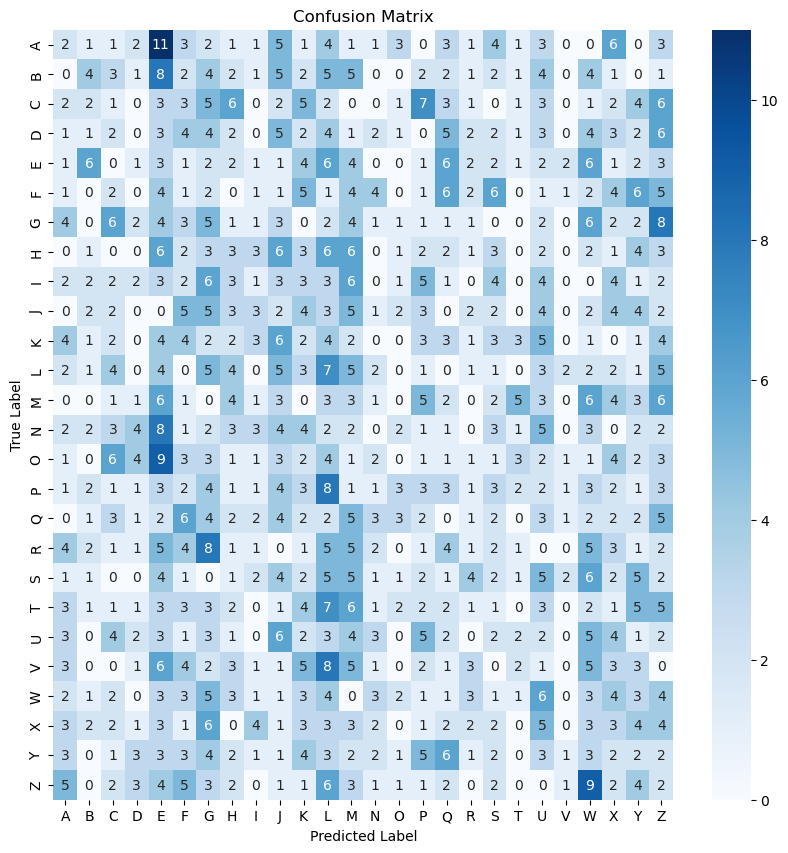

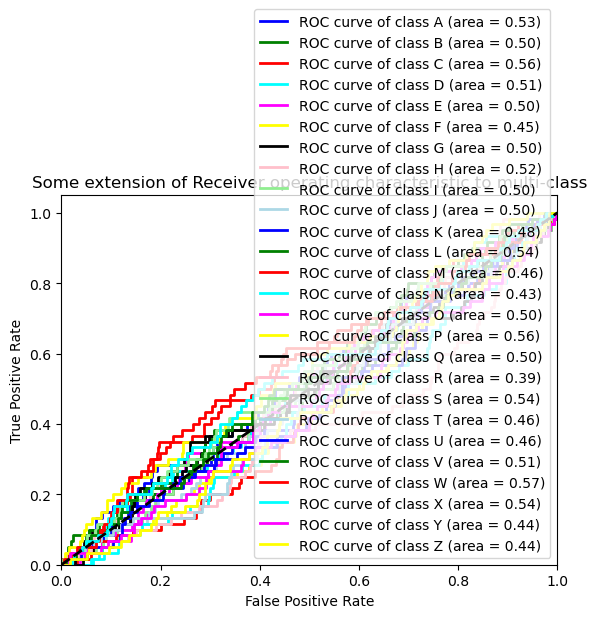

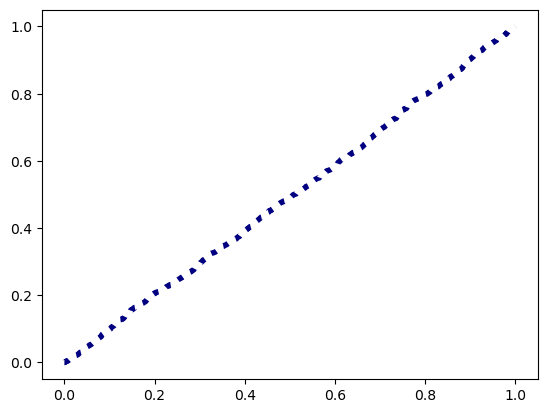

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

# Assuming model and validation_generator are already defined and initialized

# Generate predictions for the validation dataset
validation_generator.reset()  # Resetting the generator to ensure proper ordering
# Correct approach to predict on the entire validation set
predictions = Dense(your_number_of_classes, activation='softmax')(x)
predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.n / validation_generator.batch_size))

predicted_classes = np.argmax(predictions, axis=1)

# Adjusting predicted_classes to match the length of true_classes, if necessary
# Note: This adjustment is crucial if the last batch of the generator is not full (less than batch_size).
if len(predicted_classes) > len(validation_generator.classes):
    predicted_classes = predicted_classes[:len(validation_generator.classes)]

# True labels
true_classes = validation_generator.classes

# True labels are one-hot encoded for multi-class ROC AUC
true_labels_one_hot = tf.keras.utils.to_categorical(true_classes, num_classes=your_number_of_classes)

# Ensure predicted_classes are trimmed or extended to match true_classes' length
predicted_classes = np.argmax(predictions, axis=1)
if len(predicted_classes) != len(true_classes):
    # Adjusting in case of length mismatch
    predicted_classes = predicted_classes[:len(true_classes)]

print("True classes: ", true_classes)
# Generate dynamic class labels based on the validation_generator class indices
class_indices = validation_generator.class_indices
# Assuming class_indices is correct based on the actual classes present in the dataset
# Ensure class_labels are derived correctly from validation_generator.class_indices
class_labels = list(validation_generator.class_indices.keys())  # This is correct

print("Class labels: ", class_labels)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


# Display the confusion matrix using matplotlib and seaborn for better visualization
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(your_number_of_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(your_number_of_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(your_number_of_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= your_number_of_classes

# Plot all ROC curves
plt.figure()

colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])
for i, color in zip(range(your_number_of_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(your_number_of_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(your_number_of_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= your_number_of_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the macro-averaged ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.show()

# 4. Webcam (not now)